In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kwangsam\anaconda3\envs\python36\lib\site-pack

In [5]:
tf.__version__

'1.9.0'

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
x_train, y_train = mnist.train.images, mnist.train.labels

In [9]:
x_test, y_test = mnist.test.images, mnist.test.labels

In [10]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

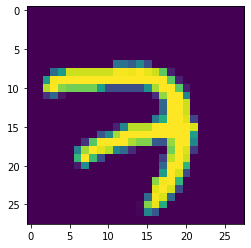

In [11]:
plt.imshow(x_train.reshape(-1, 28, 28)[0])

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

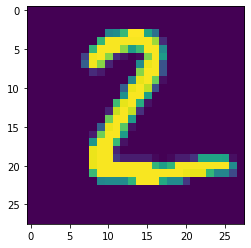

In [13]:
plt.imshow(x_test.reshape(-1, 28, 28)[1])

In [14]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

## Build input variables

In [15]:
X = tf.placeholder(tf.float32, shape=[None, 784])

In [16]:
Y = tf.placeholder(tf.float32, shape=[None, 10])

## Input Layer

In [17]:
x_image = tf.reshape(tensor=X, shape=[-1, 28, 28, 1])

## Convolutional Layer 1

In [18]:
kernel_size = 5
pool_size = 2

In [19]:
W_conv1 = tf.Variable(tf.truncated_normal([kernel_size, kernel_size, 1, 32], stddev=0.1))

In [20]:
h_conv1_in = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')

In [21]:
h_conv1_out = tf.nn.relu(h_conv1_in)

In [22]:
h_pool_1 = tf.nn.max_pool(h_conv1_out, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

## Convolutional Layer 2

In [23]:
W_conv2 = tf.Variable(tf.truncated_normal([kernel_size, kernel_size, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [24]:
h_conv2_in = tf.nn.conv2d(h_pool_1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')

In [25]:
h_conv2_out = tf.nn.relu(h_conv2_in)

In [26]:
h_pool_2 = tf.nn.max_pool(h_conv2_out, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

## Dense Layer: convert to a Flat 1 Dimmensional array

In [27]:
h_pool_2_flat = tf.reshape(h_pool_2, [-1, 7*7*64])

In [28]:
W_fc1 = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))

In [29]:
h_fc1_in = tf.add(tf.matmul(h_pool_2_flat, W_fc1), b_fc1)

In [30]:
h_fc1_out = tf.nn.relu(h_fc1_in)

## Logit Layer

In [31]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

In [32]:
h_fc2_in = tf.add(tf.matmul(h_fc1_out, W_fc2), b_fc2)

In [33]:
y_estimated = tf.nn.softmax(h_fc2_in)

In [34]:
guess = tf.argmax(y_estimated, 1)

## loss function

In [35]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=y_estimated))

In [36]:
learning_rate = 0.0001
training_epoch = 3000
batch_size = 128
display_step = 100

## Optimizer

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
model = optimizer.minimize(cost)

In [42]:
sess = tf.Session()

In [43]:
init = tf.global_variables_initializer()

In [44]:
sess.run(init)

In [47]:
for step in range(training_epoch):
    x_data, y_data = mnist.train.next_batch(batch_size)
    sess.run(model, feed_dict={X: x_data, Y: y_data})
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(y_estimated, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    if step % display_step == 0:
        print("epoch = ", step, "accuracy = ", sess.run(accuracy, feed_dict={X: x_data, Y: y_data}), 
                "cost = ", sess.run(cost, feed_dict={X: x_data, Y: y_data}))

print("epoch = ", step+1, "accuracy = ", sess.run(accuracy, feed_dict={X: x_data, Y: y_data}),
         "cost = ", sess.run(cost, feed_dict={X: x_data, Y: y_data}))

epoch =  0 accuracy =  0.5625 cost =  1.890423
epoch =  100 accuracy =  0.6953125 cost =  1.7737389
epoch =  200 accuracy =  0.78125 cost =  1.6921226
epoch =  300 accuracy =  0.7890625 cost =  1.6756344
epoch =  400 accuracy =  0.734375 cost =  1.7311655
epoch =  500 accuracy =  0.828125 cost =  1.6339122
epoch =  600 accuracy =  0.7265625 cost =  1.7384586
epoch =  700 accuracy =  0.796875 cost =  1.6621962
epoch =  800 accuracy =  0.7578125 cost =  1.6979134
epoch =  900 accuracy =  0.8359375 cost =  1.6280994
epoch =  1000 accuracy =  0.828125 cost =  1.6305851
epoch =  1100 accuracy =  0.7578125 cost =  1.6961023
epoch =  1200 accuracy =  0.765625 cost =  1.7000849
epoch =  1300 accuracy =  0.75 cost =  1.7088434
epoch =  1400 accuracy =  0.8203125 cost =  1.6409553
epoch =  1500 accuracy =  0.765625 cost =  1.6981004
epoch =  1600 accuracy =  0.8984375 cost =  1.5644464
epoch =  1700 accuracy =  0.9296875 cost =  1.5314074
epoch =  1800 accuracy =  0.8515625 cost =  1.615311
epoc

In [48]:
print("accuracy = ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}),
         "cost = ", sess.run(cost, feed_dict={X: x_test, Y: y_test}))

accuracy =  0.9858 cost =  1.4773892


In [49]:
y_out = sess.run(y_estimated, feed_dict={X: x_test, Y: y_test})
guess_out = sess.run(guess, feed_dict={X: x_test, Y: y_test})

In [50]:
y_test[:100]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [51]:
y_out[0:100]

array([[1.70057978e-12, 6.34265047e-13, 1.23179843e-11, 1.68642811e-09,
        5.94215864e-18, 2.43693209e-14, 2.44818845e-21, 1.00000000e+00,
        2.48675893e-15, 3.21975710e-11],
       [3.49828305e-10, 1.04840203e-09, 1.00000000e+00, 3.05011044e-10,
        3.98715931e-16, 5.72836100e-16, 5.65560480e-11, 1.22231471e-19,
        5.46366737e-11, 5.31648574e-19],
       [6.10418283e-06, 9.99942064e-01, 1.55638179e-06, 1.34664660e-07,
        3.71002134e-05, 7.39693178e-08, 3.59362502e-06, 8.67783729e-06,
        7.62013883e-07, 7.48219353e-09],
       [1.00000000e+00, 1.19647714e-09, 3.26417005e-09, 9.43123246e-10,
        7.21952845e-11, 4.38503989e-08, 1.09247822e-09, 2.79723222e-09,
        1.02448406e-11, 7.66436470e-10],
       [2.55677413e-09, 5.98535735e-11, 1.04041558e-13, 2.71395428e-12,
        9.99999762e-01, 5.29159615e-12, 6.76910947e-13, 6.34338471e-10,
        2.11294347e-13, 2.02339109e-07],
       [1.75094920e-06, 9.99986172e-01, 8.41833696e-08, 3.63893129e-08,
   

In [52]:
guess_out.reshape(-1, 1)[:100]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9],
       [0],
       [6],
       [9],
       [0],
       [1],
       [5],
       [9],
       [7],
       [3],
       [4],
       [9],
       [6],
       [6],
       [5],
       [4],
       [0],
       [7],
       [4],
       [0],
       [1],
       [3],
       [1],
       [3],
       [4],
       [7],
       [2],
       [7],
       [1],
       [2],
       [1],
       [1],
       [7],
       [4],
       [2],
       [3],
       [5],
       [1],
       [2],
       [4],
       [4],
       [6],
       [3],
       [5],
       [5],
       [6],
       [0],
       [4],
       [1],
       [9],
       [5],
       [7],
       [8],
       [9],
       [3],
       [7],
       [4],
       [6],
       [4],
       [3],
       [0],
       [7],
       [0],
       [2],
       [9],
       [1],
       [7],
       [3],
       [2],
       [9],
       [7],
       [7],
       [6],
       [2],
    